# Autonomous Driving Fuzzy System RME
The objective is to develop a fuzzy system to indicate the car how to move the direction of the wheels. 

This is represented in a range [-30, 30] in which a 0 value represents the 
steering wheel being straight, a negative value indicates the car to lean to the left, a positive value to the right.

Technically this number is the angle in degrees of the wheels, so a value of -20 would indicate that our wheels are 20 degrees to the left.

The device extracts data from the sensors mounted on the car and executes this fuzzy rule engine at 100Hz, that is once every 10 milliseconds or 100 times a second. This is fast enough to adjust to unexpected objects on the road, as human reaction time is in the range of, at least, 100 to 200 milliseconds if the user is looking at the road. Also, 10ms is enough for consumer grade hardware to execute our software, as modern CPU's are in the range of 3Ghz, that means it has time to execute 30.000.000 cpu instructions in 10ms, enough for our fuzzy engine.

![Diagram](https://i.imgur.com/IwDD9ns.png)

*The illustration represents our autonomous car, equiped with our fuzzy rule engine that provides it with Level 3 autonomous driving.*

As you might already know, they are 6 levels of autonomous driving, that classify the capabilities of the system depending on the user interaction required and the features available. [1]

*   Level 0 – No Automation
*   Level 1 – Driver Assistance (adaptive cruise control and lane keep assist)
*   Level 2 – Partial Automation (controls speed and steering, hands required)
*   Level 3 – Conditional Automation (no hands on wheel required under ideal conditions)
*   Level 4 – High Automation (no human interaction, limited to certain routes)
*   Level 5 – Full Automation (no human interaction, fully capable)

Our system is defined as level 3 as under ideal conditions its capable to drive by itself, but is required that the user keeps his hands on the wheel prepared to take control at any moment.

Our fuzzy rule engine only controls the steering wheel, the brake and accelerator are not part of this intelligent system.


![alt text](https://i.imgur.com/iC9wSqE.png)

*In the picture above the effect of different SteeringAngle values can be appreciated, as seen, a negative value makes the car steer to the left, and a positive value to the right.*

Remember that this engine is executed 100 times a second, so once the vehicle starts a maneuver it will keep changing the SteeringAngle value with the new conditions.

# Code


We set up the enviroment to display charts inline and hide warings.

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We install and import scikit fuzzy [2], import numpy and matplotlib.

In [0]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib


Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


## Antecedents (Inputs)

As described in Fuzzy Inference Process [3], we need our Antecedents or Inputs to be defined in our system, this are the values that come from our sensors built onto the car.

*   Vertical distance to vehicle in front ― DistanceFrontVehicle [1 to 50]
*   Left horizontal distance to obstacle ― DistanceLeftObstacle [0 to 10]
*   Right horizontal distance to obstacle ― DistanceRightObstacle [0 to 10]
*   Current Lane ― CurrentLane [-2, -1, 0]        | Lane -2 | Lane -1 | Lane 0 |

Distances are measured in meters, all our highways have at least three lanes and our system is built for right-hand traffic [4] countries.

![right and left hand traffic](https://i.imgur.com/AXGdtmq.png)

*Colored in red, countries in which cars are expected to drive on the right side of the road.*


## Consequences (Outputs)

The consequences or outputs are the values that are controlled by our system, in this case, our engine controls the angle of the steering wheel of our car.

For each collection of inputs, an output is given based on the Fuzzy Rules [5] defined below. 

*   Steering Wheel angle ― SteeringAngle [-30 to 30]




![Inputs](https://i.imgur.com/KGhPeL6.png)

*In this picture we can appreciate the sensors mounted on the car that are reporting values to our fuzzy rule engine, this are called Antecedents or Inputs.*

# Defining our Antecedents and Consecuences

We will be using automembership functions to label automatically some antecedents. CurrentLane and SteeringAngle will have custom labels to clarify their meaning.

In [0]:
# Antecedents
DistanceFrontVehicle = ctrl.Antecedent(np.arange(1, 51, 1), 'DistanceFrontVehicle')
DistanceLeftObstacle = ctrl.Antecedent(np.arange(0, 11, 1), 'DistanceLeftObstacle')
DistanceRightObstacle = ctrl.Antecedent(np.arange(0, 11, 1), 'DistanceRightObstacle')
CurrentLane = ctrl.Antecedent(np.arange(-2, 1, 1), 'CurrentLane')

# Consecuences
SteeringAngle = ctrl.Consequent(np.arange(-30, 31, 1), 'SteeringAngle')

# Auto-membership function divides your range in a certain number of labels automatically
DistanceFrontVehicle.automf(7)
DistanceLeftObstacle.automf(5)
DistanceRightObstacle.automf(5)

# If you want to define custom shapes or change label names you have to assing them manually
# Values for the triangle [Left minimum (start), center maximum, right minimum (end)]
# Triangle: Three-element vector controlling shape of function
CurrentLane['left'] = fuzz.trimf(CurrentLane.universe,            [-2, -2, -1])
CurrentLane['center'] = fuzz.trimf(CurrentLane.universe,          [-2, -1, 0])
CurrentLane['right'] = fuzz.trimf(CurrentLane.universe,           [-1, 0, 1])

SteeringAngle['farLeft'] = fuzz.trimf(SteeringAngle.universe,     [-30, -30, -20])
SteeringAngle['left'] = fuzz.trimf(SteeringAngle.universe,        [-30, -20, -10])
SteeringAngle['centerLeft'] = fuzz.trimf(SteeringAngle.universe,  [-20, -10, 0])
SteeringAngle['center'] = fuzz.trimf(SteeringAngle.universe,      [-10, 0, 10])
SteeringAngle['centerRight'] = fuzz.trimf(SteeringAngle.universe, [0, 10, 20])
SteeringAngle['right'] = fuzz.trimf(SteeringAngle.universe,       [10, 20, 30])
SteeringAngle['farRight'] = fuzz.trimf(SteeringAngle.universe,    [20, 30, 30])


# Displaying Antecedents and Consecuences

Antecedents can be displayed in a chart showing the labels and its shape.

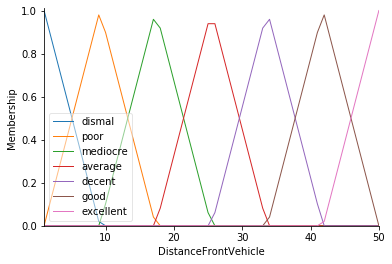

In [0]:
DistanceFrontVehicle.view()

Each mountain represents a label, they are not perfect triangles as they overlap between each other, and in each point of the X axis the values in the Y should add to 1.0 membership, that is, the membership to labels is always 100% divided into one or several ones.

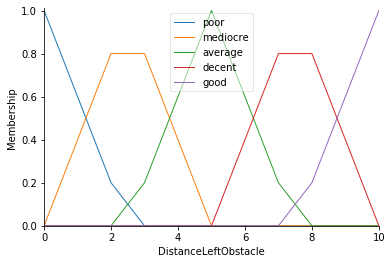

In [0]:
DistanceLeftObstacle.view()


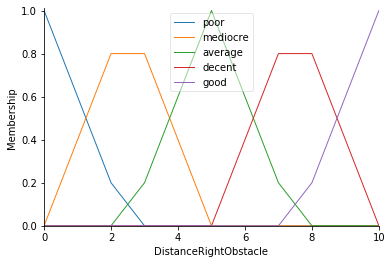

In [0]:
DistanceRightObstacle.view()


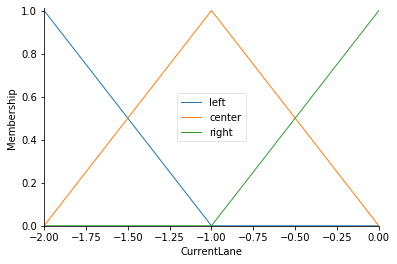

In [0]:
CurrentLane.view()

Consecuences can be also displayed in the same way.

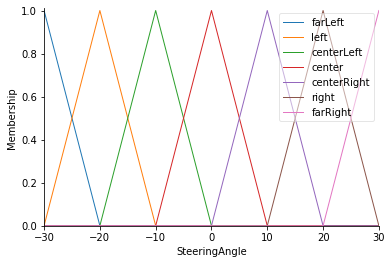

In [0]:
SteeringAngle.view()

# Setting up Fuzzy Rules

We have our inputs, our outputs, now we need our Fuzzy Logic [6], that is the way in which we combine our inputs to get our output.

As we know the basic rules of driving we can write a few rules based on our inputs.

*   Rules to overtake cars & avoid frontal collisions
*   Rules to avoid lateral collisions
*   Rules to slowly change lanes if they are free
*   Rule to stay on course if the car in front is not near
*   Rules for compliance. Prefer the right lane when possible

In fuzzy logic, rules can contradict each other if needed, the engine will handle this for us.

Remember that every rule weights the same, so if two of them are the fully contradictory they will cancel each other.

We have the AND, OR and NOT operators available [7], and you can use parenthesis to separate logical blocks and to set priority in operations.



In [0]:
# Rules to overtake cars & avoid frontal collisions
# If the car in front of us is near, move lane if possible. Left overtaking is prefered.
rule1 = ctrl.Rule(DistanceFrontVehicle['poor'] & CurrentLane['left'], SteeringAngle['right'])
rule2 = ctrl.Rule(DistanceFrontVehicle['poor'] & CurrentLane['center'], SteeringAngle['left'])
rule3 = ctrl.Rule(DistanceFrontVehicle['poor'] & CurrentLane['right'], SteeringAngle['left'])

rule14 = ctrl.Rule(DistanceFrontVehicle['dismal'] & CurrentLane['left'], SteeringAngle['farRight'])
rule15 = ctrl.Rule(DistanceFrontVehicle['dismal'] & CurrentLane['center'], SteeringAngle['farLeft'])
rule16 = ctrl.Rule(DistanceFrontVehicle['dismal'] & CurrentLane['right'], SteeringAngle['farLeft'])

# Rules to avoid lateral collisions
# If distance to obstacle is low, try moving the opposite way
rule3 = ctrl.Rule(DistanceLeftObstacle['poor'], SteeringAngle['farRight'])
rule4 = ctrl.Rule(DistanceLeftObstacle['mediocre'], SteeringAngle['right'])
rule5 = ctrl.Rule(DistanceRightObstacle['poor'], SteeringAngle['farLeft'])
rule6 = ctrl.Rule(DistanceRightObstacle['mediocre'], SteeringAngle['left'])

# Rules to slowly change lanes if they are free
rule7 = ctrl.Rule(DistanceLeftObstacle['decent'] & CurrentLane['center'], SteeringAngle['centerLeft'])
rule8 = ctrl.Rule(DistanceRightObstacle['decent'] & CurrentLane['center'], SteeringAngle['centerRight'])
rule9 = ctrl.Rule(DistanceRightObstacle['decent'] & CurrentLane['left'], SteeringAngle['centerRight'])
rule10 = ctrl.Rule(DistanceLeftObstacle['decent'] & CurrentLane['right'], SteeringAngle['centerLeft'])

# Rule to stay on course if the car in front is not near 
rule11 = ctrl.Rule(~DistanceFrontVehicle['dismal'] & ~DistanceFrontVehicle['poor'], SteeringAngle['center'])

# Rules for compliance. Prefer the right lane when possible
rule12 = ctrl.Rule(~DistanceFrontVehicle['dismal'] & CurrentLane['left'] & ~DistanceRightObstacle['mediocre'] & ~DistanceRightObstacle['poor'], SteeringAngle['centerRight'])
rule13 = ctrl.Rule(~DistanceFrontVehicle['dismal'] & CurrentLane['center'] & ~DistanceRightObstacle['mediocre'] & ~DistanceRightObstacle['poor'], SteeringAngle['centerRight'])

# Control System Creation and Simulation

Finally we add our rules to our control system, we define the simulation.

In [0]:
adrive_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])

adrive_sys = ctrl.ControlSystemSimulation(adrive_ctrl)

Then, as our rule engine is built, we can just define the inputs and compute the output as needed.

The SteeringAngle output based on the Antecedents is 15.3538 degrees.
 


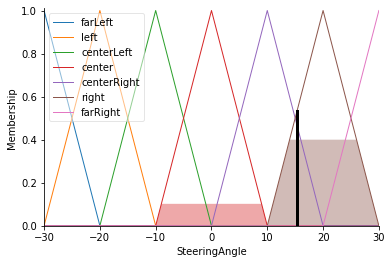

In [0]:
# Pass inputs to the ControlSystem using Antecedent labels
adrive_sys.input['DistanceFrontVehicle'] = 10
adrive_sys.input['DistanceLeftObstacle'] = 4
adrive_sys.input['DistanceRightObstacle'] = 10
adrive_sys.input['CurrentLane'] = 0

# Crunch the numbers
adrive_sys.compute()

# Display the output in a readable way and view the SteeringAngle chart.
print("The SteeringAngle output based on the Antecedents is " + str(  round(adrive_sys.output['SteeringAngle'], 4) ) + " degrees.")
print(" ")
SteeringAngle.view(sim=adrive_sys)

There is also a chart visualization for the Consequence, graphically you can see what labels were the ones that are weighted for this specific answer based on the Antecendents.

# Test cases
We will be tring some test cases to assess that our model is working as expected in common situations.

## Test case 1
Driving in the right lane, no vehicles in front, no obstacles on left nor right.

Output should be 0 degrees, not steering left nor right.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 50
adrive_sys.input['DistanceLeftObstacle'] = 10
adrive_sys.input['DistanceRightObstacle'] = 10
adrive_sys.input['CurrentLane'] = 0
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


0.0

## Test case 2
Driving in the center lane, no vehicles in front, no obstacles on left nor right.

Output should be positive, as driving on the center lane is not recommended if the right lane is clear.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 50
adrive_sys.input['DistanceLeftObstacle'] = 10
adrive_sys.input['DistanceRightObstacle'] = 10
adrive_sys.input['CurrentLane'] = -1
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


5.0

## Test case 3
Driving in the center lane, no vehicles in front, obstacle on the right.

Output should be negative or 0, as we want to keep distance with the vehicle on the right lane to avoid lateral impact.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 50
adrive_sys.input['DistanceLeftObstacle'] = 10
adrive_sys.input['DistanceRightObstacle'] = 4
adrive_sys.input['CurrentLane'] = -1
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


-2.534

## Test case 4
Driving in the center lane, no obstacles in left nor right but the vehicle in front is near.

Output should be very negative, as we want to overtake the vehicle using the left lane. As its not recommended to overtake using the right lane.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 3
adrive_sys.input['DistanceLeftObstacle'] = 10
adrive_sys.input['DistanceRightObstacle'] = 10
adrive_sys.input['CurrentLane'] = -1
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


-9.408

## Test case 5
Driving in the center lane, no obstacles in left nor right but the vehicle in front is very near.

Output should be more negative, as we want to overtake the vehicle using the left lane. As its not recommended to overtake using the right lane.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 1
adrive_sys.input['DistanceLeftObstacle'] = 10
adrive_sys.input['DistanceRightObstacle'] = 10
adrive_sys.input['CurrentLane'] = -1
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


-26.667

## Test case 6
Driving in the right lane, obstacles on the front, left and right.

Output should be near 0, as we cannot move in any direction safely.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 5
adrive_sys.input['DistanceLeftObstacle'] = 2
adrive_sys.input['DistanceRightObstacle'] = 2
adrive_sys.input['CurrentLane'] = 0
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


-1.101

## Test case 6
Driving in the center lane, obstacles on the front and left.

Output should be very positive, as we should change to the right lane.

In [0]:
adrive_sys.input['DistanceFrontVehicle'] = 20
adrive_sys.input['DistanceLeftObstacle'] = 2
adrive_sys.input['DistanceRightObstacle'] = 9
adrive_sys.input['CurrentLane'] = -1
adrive_sys.compute()
round(adrive_sys.output['SteeringAngle'], 3)


9.995

# Conclusion

We have build a comprehensive Fuzzy Rule Engine to control the steering wheel of an autonomous driving car. This system is obviously primitive but it seems to be working as expected and behaving like a human driver would expect based on the provided inputs.

Similar systems, but more complex, could be used in the industry to support autonomous driving.

# Bibliography

[1] https://www.truecar.com/blog/5-levels-autonomous-vehicles/

[2] https://pythonhosted.org/scikit-fuzzy/overview.html

[3] https://www.mathworks.com/help/fuzzy/fuzzy-inference-process.html

[4] https://en.wikipedia.org/wiki/Left-_and_right-hand_traffic

[5] https://en.wikipedia.org/wiki/Fuzzy_rule

[6] https://en.wikipedia.org/wiki/Fuzzy_logic

[7] https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#rule

[ ] https://pythonhosted.org/scikit-fuzzy/userguide/fuzzy_control_primer.html

[ ] https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html